# Исследование объявлений о продаже квартир

## Изучение данных из файла

In [1]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn

In [2]:
# чтение файла с данными и сохранение в df с использованием конструкции try-except
try:
    df = pd.read_csv('C:/Users/datasets/real_estate_data.csv', sep='\t')  # локальный путь
except:
    df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # серверный путь

In [3]:
# получение 10 строк таблицы df
df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3700,11,5280000.0,43.0,2017-01-26T00:00:00,1,NaN,17.0,20.0,6,False,...,11.0,1.0,Сестрорецк,56343.0,33272.0,0.0,NaN,1.0,545.0,103.0
22143,0,4300000.0,42.0,2016-05-19T00:00:00,1,NaN,12.0,NaN,3,NaN,...,NaN,0.0,Санкт-Петербург,40793.0,10976.0,3.0,371.0,0.0,NaN,284.0
16485,11,5300000.0,45.0,2017-10-22T00:00:00,1,2.60,17.0,20.0,14,NaN,...,11.0,NaN,Санкт-Петербург,34273.0,15372.0,1.0,518.0,3.0,491.0,138.0
1278,18,2390000.0,34.2,2016-09-23T00:00:00,1,NaN,5.0,15.5,4,NaN,...,8.1,NaN,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,722.0
9609,8,4000000.0,43.4,2018-01-21T00:00:00,2,2.50,5.0,NaN,4,NaN,...,NaN,NaN,Санкт-Петербург,20539.0,5191.0,1.0,1299.0,3.0,407.0,45.0
16289,13,4000000.0,52.0,2016-06-03T00:00:00,2,2.83,5.0,30.0,4,NaN,...,9.2,NaN,Петергоф,36606.0,40031.0,0.0,NaN,0.0,NaN,585.0
22939,15,6050000.0,68.4,2017-05-25T00:00:00,3,2.66,12.0,44.7,11,NaN,...,8.3,2.0,Санкт-Петербург,13721.0,15765.0,0.0,NaN,0.0,NaN,111.0
9543,8,3800000.0,35.1,2018-02-20T00:00:00,1,NaN,9.0,18.3,7,NaN,...,6.8,1.0,Санкт-Петербург,12444.0,15035.0,0.0,NaN,1.0,881.0,223.0
11952,6,3250000.0,31.9,2018-04-08T00:00:00,1,2.50,5.0,18.0,5,NaN,...,5.3,NaN,Сестрорецк,58571.0,35501.0,1.0,549.0,2.0,218.0,205.0
5800,7,7249000.0,45.0,2017-09-26T00:00:00,1,NaN,13.0,17.5,12,NaN,...,11.0,1.0,Санкт-Петербург,29609.0,5032.0,1.0,620.0,1.0,809.0,9.0


In [4]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
# получение статистической информации о данных
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

Итак, мы имеем датафрейм, состоящий 22 столбцов и 23699 строк. Столбцы имеют следующий тип данных: булевый (2), строка (3) и числовой (целые числа-3, вещественные числа-14). В каждой строке - информация о квартире, выставленной на продажу. Количество значений в столбцах различается, а значит, в данных есть пропущенные значения. При чем пропуски имеются в 14 из 22 столбцах.
Просмотр статистических данных показал, что в данных есть странные значения, например минимальная высота потолков 1 метр, а максимальная 100 метров или минимальное количество комнат - 0.

## Предобработка данных

In [6]:
# подсчёт пропусков
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В столбце `ceiling_height` пропущено 9195 значений. Попробуем заменить пропуски медианой

In [7]:
# просмотр уникальных значений количества балконов
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

In [8]:
# замена пропусков в столбце ceiling_height медианой
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [9]:
# проверка
df['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

Что касается столбцов `kitchen_area` и `living_area`, то у нас имееются значения трех площадей (общая, жилая и кухни), а также количество комнат. Будем их использовать для заполнения пропусков. Чтобы заполнить пропущенные значения в столбце `kitchen_area`, рассчитаем средний процент в зависимости от количества комнат, который занимает кухня от общей площади,после чего перемножим его на общую площадь

In [10]:
df['percent_kitchen'] = df['kitchen_area'] / df['total_area'] # рассчет процента
df.groupby('rooms')['percent_kitchen'].mean() # рассчет среднего процента для каждого количества комнат

rooms
0          NaN
1     0.249906
2     0.174163
3     0.140928
4     0.124031
5     0.113455
6     0.104150
7     0.091932
8     0.091708
9     0.075054
10    0.088013
11    0.066855
12    0.124444
14    0.075636
15    0.169492
16    0.048148
19    0.073679
Name: percent_kitchen, dtype: float64

In [11]:
# создание функции, которая счистает средние значение для каждого количества комнат
# и рассчитывает площадь кухни, если пропущено значение
def kitchen_area_mean(row):
    total_area = row['total_area']
    rooms_percent = df.loc[df['rooms']==row['rooms']]['percent_kitchen'].mean()
    if pd.isnull(row['kitchen_area']):
        kitchen_mean = total_area*rooms_percent
        return kitchen_mean
    else:
        return row['kitchen_area']
df['kitchen_area'] = df.apply(kitchen_area_mean, axis=1) # замена пропусков методом apply, который в качестве аргумента принимает нашу функцию

Проверим работу функции. В строке с индексом 3 был пропуск, выведем первые пять значений столбца `kitchen_area`

In [12]:
# проверка
df['kitchen_area'].head()

0    25.000000
1    11.000000
2     8.300000
3    22.407531
4    41.000000
Name: kitchen_area, dtype: float64

In [13]:
# проверка пропусков
df['kitchen_area'].isna().sum()

197

In [14]:
# просмотр пропусков, сгруппированных по количеству комнат
df[df['kitchen_area'].isna()]['rooms'].value_counts()

0    197
Name: rooms, dtype: int64

Проверим являются ли данные квартиры студиями и если нет, то сделаем срез по ним

In [15]:
# проверка, являются ли квартиры с количеством комнат 0 студиями
df[df['kitchen_area'].isna()]['studio'].value_counts()

True     138
False     59
Name: studio, dtype: int64

In [16]:
# срез данных по studio==False
df.query('kitchen_area=="nan" and studio==False')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,percent_kitchen
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.0,1,NaN,...,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.3,19,NaN,...,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,NaN
780,9,2600000.0,26.10,2018-02-20T00:00:00,0,2.65,18.0,NaN,8,NaN,...,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN
839,14,1900000.0,35.00,2017-04-14T00:00:00,0,2.70,5.0,15.0,3,False,...,1.0,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN
946,5,2200000.0,23.00,2016-09-27T00:00:00,0,2.65,27.0,18.0,7,NaN,...,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.0,NaN
1574,0,2200000.0,22.00,2017-11-03T00:00:00,0,2.65,18.0,15.0,16,NaN,...,1.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.0,NaN
1625,7,1980000.0,23.98,2018-02-01T00:00:00,0,2.65,4.0,10.5,3,NaN,...,1.0,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0,NaN
2532,5,3500000.0,27.10,2018-02-01T00:00:00,0,2.65,18.0,18.7,9,NaN,...,2.0,Санкт-Петербург,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0,NaN
3019,18,2100000.0,24.00,2017-11-10T00:00:00,0,2.65,10.0,18.0,6,NaN,...,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
4115,7,2600000.0,24.00,2018-02-01T00:00:00,0,2.65,25.0,18.0,4,NaN,...,2.0,Санкт-Петербург,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0,NaN


Итого имеем 59 квартир, где количество комнат равно 0 и которые не являются студиями. Судя по общей площади, квартиры больше похоже на студии. Возможно во время заполнения данных была допущена ошибка. Исходя из этого, заполним пропуски 0.

In [17]:
# замена пропущенных значений на 0
df['kitchen_area'] = df['kitchen_area'].fillna(0)

In [18]:
# проверка пропусков
df['kitchen_area'].isna().sum()

0

В столбце `living_area` 1903 пропуска. Как было сказано выше, у нас имеется целых три площади: общая, жилая и кухни. Если сложить площадь кухни с жилой площадью, то можно найти, какой процент они занимают от общей площади. В среднем получается 75%. Следовательно, можно заполнить пропуски, умножив полученный процент на общую площадь

In [19]:
# расчет процента
(((df['living_area']+df['kitchen_area']))/df['total_area']*100).mean()

75.06013661805304

In [20]:
# создание функции, которая для пропусков умножает процент на общую площадь
def living_area_mean(row):
    tot_area = row['total_area']
    if pd.isnull(row['living_area']):
        area = tot_area*0.7506
        return area
    else:
        return row['living_area']
df['living_area'] = df.apply(living_area_mean, axis=1) # замена пропусков методом apply    

In [21]:
# проверка пропусков
df['living_area'].isna().sum()

0

In [22]:
# проверка
df['living_area'].head()

0     51.0000
1     18.6000
2     34.3000
3    119.3454
4     32.0000
Name: living_area, dtype: float64

В столбце `balcony` пропущено 11519 значений. Возможно, раз человек не указал число балконов — скорее всего, их нет. Тогда пропущенные значения можно заменить на 0.

In [23]:
# просмотр уникальных значений количества балконов
df['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

In [24]:
# замена пропущенных значений в стролбце balcony на 0
df['balcony'] = df['balcony'].fillna(0)

In [25]:
# проверка
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

В остальные столбцах оставим пропуски пустыми, так как подходящих значений на заменут у нас нет. Кроме того наличие пропусков не повлияет на наше исследование

У нас имеется 14 столбцов с вещественным типом данных. Заменим их на числовой тип, за исключением тех столбцов, где нам важны сантиметры: `total_area`, `living_area`, `kitchean_area`, `ceiling_height`. Чтобы превести вещественные числа в целые воспользуемся методом `astype()`Б кроме столбца `days_exposition`, в котором округлим округлим значения самостоятельно и только потом поменяем тип (если этого не сделать, то будет ошибка)

In [26]:
# округление значений столбца days_exposition
df['days_exposition'] = pd.to_numeric(df['days_exposition'], errors='coerce')
df['days_exposition'] = round(df['days_exposition'])

In [27]:
# замена вещественного типа данных на целочисленный
df['balcony'] = df['balcony'].astype('int')
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('Int64')
df['floors_total'] = df['floors_total'].astype('Int64')
df['last_price'] = df['last_price'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('Int64')
df['parks_nearest'] = df['parks_nearest'].astype('Int64')
df['ponds_around3000'] = df['ponds_around3000'].astype('Int64')
df['ponds_nearest'] = df['ponds_nearest'].astype('Int64')
df['airports_nearest'] = df['airports_nearest'].astype('Int64')
df['days_exposition'] = df['days_exposition'].astype('Int64')

In [28]:
# замена типа данных object на datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

In [29]:
# проверка типов данных
df.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest                 Int64
cityCenters_nearest              Int64
parks_around3000                 Int64
parks_nearest                    Int64
ponds_around3000                 Int64
ponds_nearest                    Int64
days_exposition                  Int64
percent_kitchen                float64
dtype: object

Проверим есть ли в данных дубликаты и если есть, удалим их

In [30]:
# просмотр уникальных значений
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [31]:
# удаление населенного пунката из названия
remove_words = (
    ['посёлок', 'городской', 'деревня', 'поселок', 'городского', 'коттеджный', 'типа', 'садовое',
     'товарищество', 'село', 'при', 'железнодорожной', 'станции', 'садоводческое', 'некоммерческое']
)
pat = '|'.join(remove_words)
df['new_locality_name'] = df['locality_name'].replace(pat,'', regex=True).str.lstrip() # создание нового столбца и удаление пробелов в начале строки

In [32]:
# проверка
df['new_locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [33]:
# подсчёт дубликатов
df.duplicated().sum()

0

Таким образом, в результате изучения и просмотра данных было выявлено огромное количество пропусков. Из 22 столбцов пропуски имеются аж в 14 столбцах. Причин возникновения пропусков может быть множество. Скорее всего в нашем случае пропуски появились в результате того, что при заполнении данных о квартире продавец не указал все данные (не заполнил все поля). Так же пропуски могли стать результатом некорректной выгрузки данных или же сбой при сборе информации.
Заменять все пропуски мы не стали, так как для данного исследования пропуски не повлияют на его результат

## Расчёты и добавление результатов в таблицу

In [34]:
# расчет стоимость квадратного метра
df['price_m2'] = df['last_price'] / df['total_area']

In [35]:
# созданием новых столбцов: день недели, месяц и год публикации объявления
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [36]:
# создание функции для выделения категорий этажности
def floors(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
df['floor_category'] = df.apply(floors, axis=1) # добавление новоего стоолбца

In [37]:
# создание столбцов соотношение жилой и общей площади и отношение площади кухни к общей.
df['living_and_total_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_and_total_area_ratio'] = df['kitchen_area'] / df['total_area']

In [38]:
# просмотр первых пяти строк
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,percent_kitchen,new_locality_name,price_m2,weekday,month,year,floor_category,living_and_total_area_ratio,kitchen_and_total_area_ratio
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0000,8,NaN,...,NaN,0.231481,Санкт-Петербург,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6000,1,NaN,...,81,0.272277,Шушары,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3000,4,NaN,...,558,0.148214,Санкт-Петербург,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,119.3454,9,NaN,...,424,NaN,Санкт-Петербург,408176.100629,4,7,2015,другой,0.750600,0.140928
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0000,13,NaN,...,121,0.410000,Санкт-Петербург,100000.000000,1,6,2018,другой,0.320000,0.410000


Было создано 7 новых столбцов: стоимость квадратного метра, день недели, месяц и год публикации объявления, категория этажа, соотношение жилой и общей площади и отношение площади кухни к общей.

## Исследовательский анализ данных

Для параметров: площадь, цена, число комнат, высота потолков, построим гистограммы, диаграммы размаха и посмотрим их числовое описание, используя метод `describe()`

Text(0, 0.5, 'количество квартир')

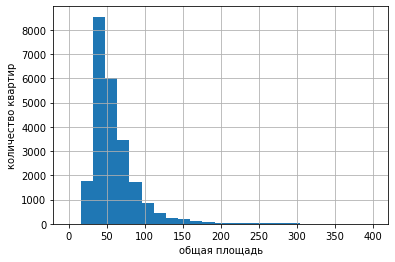

In [133]:
# гистограмма "общая площадь"
df['total_area'].hist(bins=25, range=(0, 400))
plt.xlabel('общая площадь')
plt.ylabel('количество квартир')

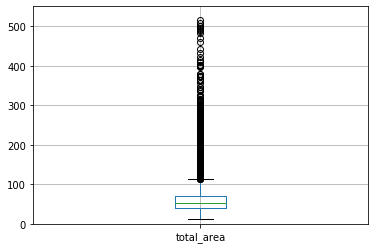

In [40]:
# диаграмма размаха "общая площадь"
plt.ylim(0, 550) 
df.boxplot('total_area')

In [41]:
# числовое описание столбца total_area
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Изучив данные об общей площади, можно сказать, что больше всего квартир площадью около 50 метров. Минимальная площадь равна 12 метров (скорее всего это комната), а максимальная площадь - аж 900 метров.

Text(0, 0.5, 'количество квартир')

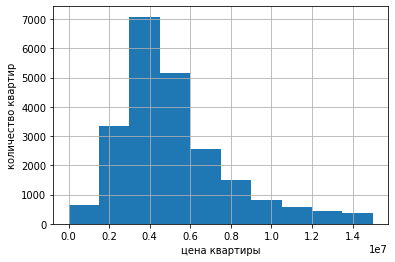

In [128]:
# гистограмма "цена квартиры"
df['last_price'].hist(bins=10, range=(0, 15000000))
plt.xlabel('цена квартиры')
plt.ylabel('количество квартир')

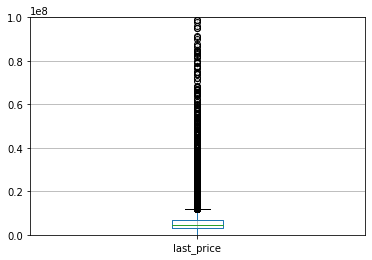

In [43]:
# диаграмма размаха "цена квартиры"
plt.ylim(0, 100000000) 
df.boxplot('last_price')

In [44]:
# числовое описание столбца last_price
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Медианное значение стоимости картиры около 4,65 млн рублей, при этом минимальная стоимость составляет всего 12190, а максимальная - 763 млн рублей. 

Text(0, 0.5, 'количество квартир')

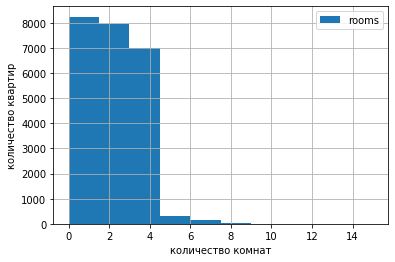

In [129]:
# гистограмма "количество комнат"
df.plot(kind='hist', y='rooms', range=(0, 15), grid=True);
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')

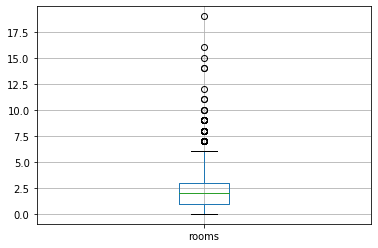

In [46]:
# диаграмма размаха "количество комнат" 
df.boxplot('rooms');

In [47]:
# числовое описание столбца rooms
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В среднем квартиры, которые были выставлены на продажу, имеют 2 комнаты. Однако есть объявления, в которых число комнат указано 0 (студии). Максимальное количество комнат - 19.

Text(0, 0.5, 'количество квартир')

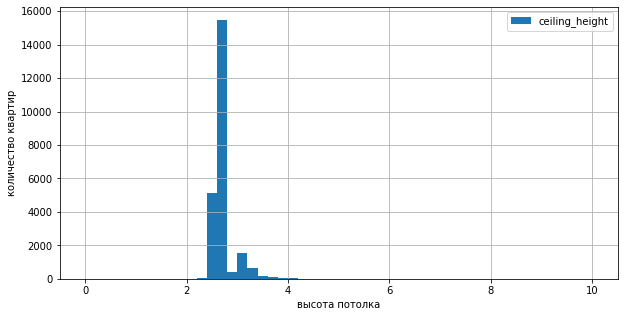

In [130]:
# гистограмма "высота потолка"
df.plot(kind='hist', y='ceiling_height', bins=50, range=(0, 10), grid=True, figsize=(10, 5));
plt.xlabel('высота потолка')
plt.ylabel('количество квартир')

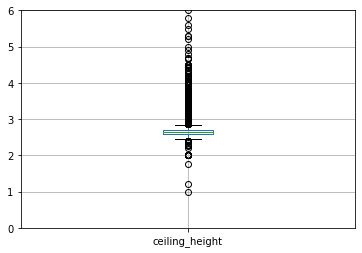

In [49]:
# диаграмма размаха "высота потолка"
plt.ylim(0, 6) 
df.boxplot('ceiling_height');

In [50]:
# числовое описание столбца ceiling_height
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

В большинстве квартир высота потолка составляет 2,6-2,7 метра. Кроме того есть квартиры, в которых высота потолка 1 и 100 метров, что немного сомнительно.

Теперь изучим время продажи квартиры

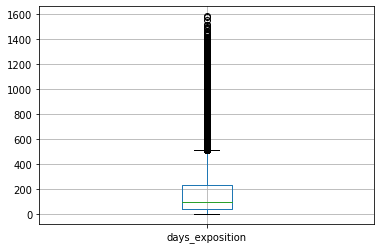

In [51]:
# диаграмма размаха "время продажи квартиры"
df.boxplot('days_exposition');

In [52]:
# числовое описание столбца days_exposition
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Text(0, 0.5, 'количество квартир')

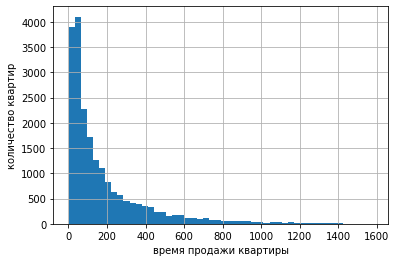

In [131]:
# гистограмма "время продажи квартиры"
df['days_exposition'].hist(bins=50);
plt.xlabel('время продажи квартиры')
plt.ylabel('количество квартир')

Таким образом, в среднем время продажи квартиры составляет 180 дней, при этом медианное значение равно 95 дней. Нижний «ус» на диаграмме размаха упирается в 0. Верхний заканчивается около 500 дней — это 1,5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом.  Следовательно, продажа квартиры длилась необычно долго, когда время продажи квартиры составляет более 500 дней. 

Изучив наши параметры (площадь, цена, число комнат, высота потолков), можно сказать, что в данных имеются редкие и выбивающиеся значения. Например, стоимость квартиры, стандартное отклонение которого составляет 10.9 млн рублей. Это говорит о том, что в наборе данных есть серьёзные аномалии или выбросы. Сделаем срез данных, ориентируясь на границы "усов" диаграмм рассеивания

In [54]:
# методом query убираем редкие и выбивающиеся значения
df_filtered = df.query('last_price<=14000000 and total_area<=120 and rooms<=6 and 2.4<ceiling_height<4.5')
df_filtered.shape # размер получившейся таблицы

(21975, 31)

Изучим, зависит ли цена от площади, числа комнат, удалённости от центра. Для этого найдем коэффициенты корреляции и построим матрицу диаграмм рассеивания. Так как в столбце `cityCenters_nearest` имеются пропуски, для этого параметра построим диаграмму рассеивания отдельно

In [55]:
# матрица корреляции 
df_filtered[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.726142,0.455600,-0.353203
total_area,0.726142,1.000000,0.802664,-0.154085
rooms,0.455600,0.802664,1.000000,-0.093900
cityCenters_nearest,-0.353203,-0.154085,-0.093900,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e3fd18dd0>,
      dtype=object)

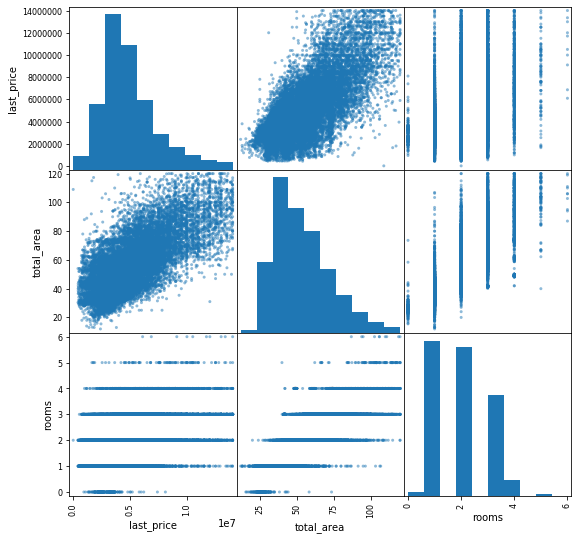

In [139]:
# матрица диаграмм рассеяния
pd.plotting.scatter_matrix(df_filtered[['last_price', 'total_area', 'rooms']], figsize=(9, 9));

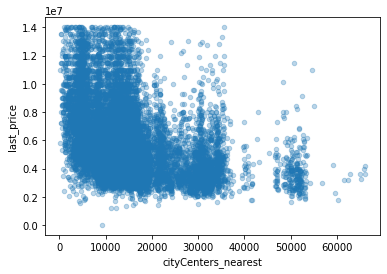

In [57]:
# диаграмма рассеивания
df_filtered.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3); 

Посчитав коэффициенты кореляции и построив диаграммы, мы видим, что цена квартиры зависит от площади, что логично: чем больше площадь, тем выше цена. Количество комнат влияет на цену почти в 1.5 раза слабее (коэффициент корреляции = 0,45). Что касается удаленности от цента, то коэффициент корреляции отрицателен, то есть чем меньше расстояние до центра, тем выше цена.  

Далее посмотрим есть ли зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом, построив столбчатую диаграмму. Для этого сперва сгруппируем данные по категории этажа и найдем среднее значение стоимости квартиры

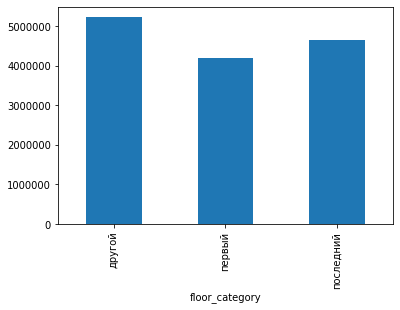

In [102]:
# столбчатая диаграмма
df_filtered.groupby('floor_category')['last_price'].mean().plot(kind='bar');

На диаграмме видно, что квартиры, располагающиеся на первом и последнем этажах в среднем стоят дешевле, чем квартиры, располагающиеся на любом другом этаже

Чтобы изучить зависимость от даты размещения: дня недели, месяца и года, также построим столбчатую диаграмму.

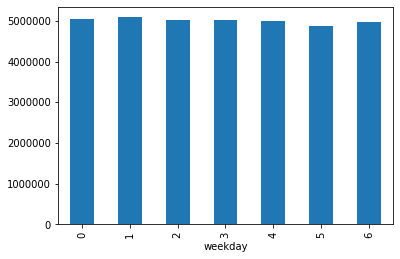

In [101]:
# столбчатая диаграмма для дня недели
df_filtered.groupby('weekday')['last_price'].mean().plot(kind='bar');

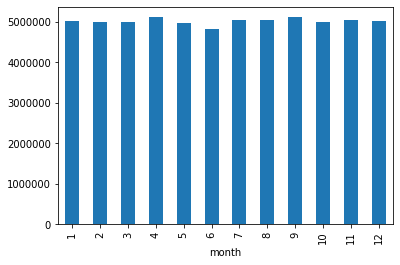

In [105]:
# столбчатая диаграмма для месяца 
df_filtered.groupby('month')['last_price'].mean().plot(kind='bar');

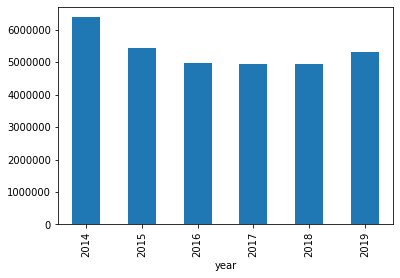

In [118]:
# столбчатая диаграмма для года 
df_filtered.groupby('year')['last_price'].mean().plot(kind='bar');

 Зависимости стоимости квартиры от даты размещения объявления цена не выявлено. Построив диаграмму по годам, мы видим, что в 2014 году квартиры были в среднем дороже, чем в другие года. Затем средняя цена снижается и только в 2019 году выросла. На мой взгляд, некорректно выявлять зависимость по всем населенным пунктам сразу, так как чем дальше квартира находится от Санкт-Петербурга, тем дешевле она стоит и если в том или ином году будет большое количество квартир, находящихся не в Санкт-Петербурге, то средняя цена естественно будет ниже.

Найдем 10 населённых пунктов с наибольшим числом объявлений и посчитаем для них среднюю цену квадратного метра, а также  определим населённые пункты с самой высокой и низкой стоимостью жилья.

In [62]:
# 10 населённых пунктов с наибольшим числом объявлений
df_filtered['new_locality_name'].value_counts().head(10)

Санкт-Петербург    14133
Мурино               588
Кудрово              471
Шушары               439
Всеволожск           393
Пушкин               339
Колпино              335
Парголово            326
Гатчина              303
Выборг               229
Name: new_locality_name, dtype: int64

In [63]:
# срез данных по 10 населенным пунктам
top_10 = df_filtered.query('new_locality_name in ("Санкт-Петербург", "Мурино", "Кудрово", "Шушары", "Всеволожск", "Пушкин", "Колпино", "Парголово", "Гатчина", "Выборг")')
top_10

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,percent_kitchen,new_locality_name,price_m2,weekday,month,year,floor_category,living_and_total_area_ratio,kitchen_and_total_area_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00000,8,NaN,...,NaN,0.231481,Санкт-Петербург,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60000,1,NaN,...,81,0.272277,Шушары,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30000,4,NaN,...,558,0.148214,Санкт-Петербург,92785.714286,3,8,2015,другой,0.612500,0.148214
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00000,13,NaN,...,121,0.410000,Санкт-Петербург,100000.000000,1,6,2018,другой,0.320000,0.410000
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60000,6,NaN,...,155,0.386059,Парголово,99195.710456,3,11,2017,другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,19,9200000,101.00,2019-04-01,3,3.05,15,63.00000,12,NaN,...,23,0.148515,Санкт-Петербург,91089.108911,0,4,2019,другой,0.623762,0.148515
23689,13,3550000,35.30,2018-02-28,1,2.86,15,16.30000,4,NaN,...,29,0.257790,Санкт-Петербург,100566.572238,2,2,2018,другой,0.461756,0.257790
23690,3,5500000,52.00,2018-07-19,2,2.65,5,31.00000,2,NaN,...,15,0.115385,Санкт-Петербург,105769.230769,3,7,2018,другой,0.596154,0.115385
23691,11,9470000,72.90,2016-10-13,2,2.75,25,40.30000,7,NaN,...,519,0.145405,Санкт-Петербург,129903.978052,3,10,2016,другой,0.552812,0.145405


In [64]:
# расчет средней цены квадратного метра
top_10.groupby('new_locality_name')['price_m2'].mean()

new_locality_name
Всеволожск          67284.294016
Выборг              58280.151559
Гатчина             68931.687349
Колпино             75389.372149
Кудрово             95326.179139
Мурино              86064.821204
Парголово           90332.263023
Пушкин             100840.580984
Санкт-Петербург    107029.144455
Шушары              78666.165160
Name: price_m2, dtype: float64

Самое дорогое жилье в Санкт-Петербурге и Пушкине (107 и 100 тыс. за кв.м), а самое дешевое жилье в Выборге (58 тыс. за кв.м). Далее идут Всеволожск и Гатчина, стоимость квадратного метра которых составила 67 и 68 тысяч.

Выясним, какая область входит в центр.

In [65]:
# создание нового столбца с данными о расстоянии до центра города в км для квартир, находящихся в Санкт-Петрбурге
df_spb = df_filtered.query('new_locality_name=="Санкт-Петербург"')
df_spb['spb_center_km'] = round(df_spb['cityCenters_nearest']/1000)
df_spb['spb_center_km'].head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    16.0
2    14.0
4     8.0
7    12.0
9    15.0
Name: spb_center_km, dtype: float64

In [66]:
# рассчет средней цены для каждого километра
df_spb.groupby('spb_center_km')['price_m2'].mean()

spb_center_km
0.0     122387.691331
1.0     123311.340937
2.0     122186.186312
3.0     112219.211162
4.0     118850.486071
5.0     123249.055949
6.0     124900.869967
7.0     119531.317817
8.0     117826.788590
9.0     108330.941441
10.0    109819.125161
11.0    105856.979399
12.0    106399.710483
13.0    107215.365472
14.0    103874.910038
15.0    103054.918669
16.0     99915.154379
17.0     95652.633564
18.0     96585.683990
19.0     97938.544867
20.0    103081.679025
21.0     94464.856891
22.0     91137.032731
23.0     92063.679612
24.0     85736.904595
25.0     91531.371618
26.0     89285.876593
27.0     70312.500000
28.0     81161.915320
29.0     72953.365445
Name: price_m2, dtype: float64

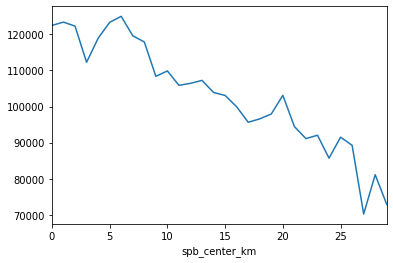

In [67]:
# построение графика
df_spb.groupby('spb_center_km')['price_m2'].mean().plot();

Границей центра Санкт-Петербурга будем считать отметку в 6 км, после этой отметки средняя стоимость кв. метра снижается. Теперь проанализируйте эту территорию, посмотрев коэффициенты корреляции и числовое описание факторов для центра и по всему городу.

In [68]:
# числовое описание площади, цены, числа комнат, высоты потолков для центра города
df_spb.query('spb_center_km<=6.0')[['last_price', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,2.161000e+03,2161.000000,2161.000000,2161.000000
mean,8.018482e+06,68.719621,2.397038,2.901666
std,2.577250e+06,22.643779,1.021378,0.325026
min,1.600000e+06,12.000000,0.000000,2.450000
25%,6.100000e+06,50.000000,2.000000,2.650000
50%,7.722600e+06,68.000000,2.000000,2.760000
75%,9.790000e+06,85.100000,3.000000,3.100000
max,1.400000e+07,120.000000,6.000000,4.370000


In [69]:
# числовое описание площади, цены, числа комнат, высоты потолков для всего города
df_spb[['last_price', 'total_area', 'rooms', 'ceiling_height']].describe()

,last_price,total_area,rooms,ceiling_height
count,1.413300e+04,14133.000000,14133.000000,14133.000000
mean,5.899971e+06,55.593523,1.993137,2.693784
std,2.442241e+06,19.803090,0.924719,0.199998
min,1.219000e+04,12.000000,0.000000,2.450000
25%,4.100000e+06,40.500000,1.000000,2.600000
50%,5.200000e+06,51.400000,2.000000,2.650000
75%,7.040000e+06,67.100000,3.000000,2.700000
max,1.400000e+07,120.000000,6.000000,4.370000


In [70]:
# матрица корреляции для центра города
df_spb.query('spb_center_km<=6.0')[['last_price', 'rooms','floor', 'cityCenters_nearest', 'weekday', 'month', 'year']].corr()

,last_price,rooms,floor,cityCenters_nearest,weekday,month,year
last_price,1.000000,0.441742,0.170149,-0.092733,-0.009566,-0.032414,-0.008789
rooms,0.441742,1.000000,-0.103417,-0.165093,-0.010249,-0.005624,-0.049054
floor,0.170149,-0.103417,1.000000,0.214362,0.044902,0.005741,-0.051775
cityCenters_nearest,-0.092733,-0.165093,0.214362,1.000000,-0.004643,-0.018699,0.032484
weekday,-0.009566,-0.010249,0.044902,-0.004643,1.000000,0.047573,-0.006405
month,-0.032414,-0.005624,0.005741,-0.018699,0.047573,1.000000,-0.224340
year,-0.008789,-0.049054,-0.051775,0.032484,-0.006405,-0.224340,1.000000


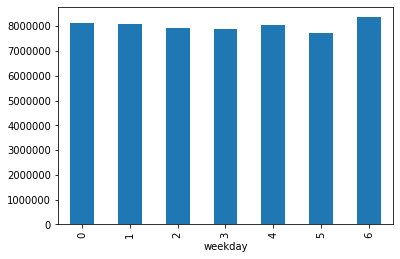

In [119]:
# столбчатая диаграмма для дня недели
df_spb.query('spb_center_km<=6.0').groupby('weekday')['last_price'].mean().plot(kind='bar');

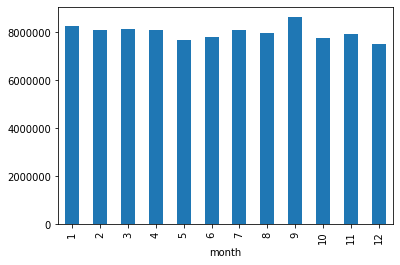

In [120]:
# столбчатая диаграмма для месяца
df_spb.query('spb_center_km<=6.0').groupby('month')['last_price'].mean().plot(kind='bar');

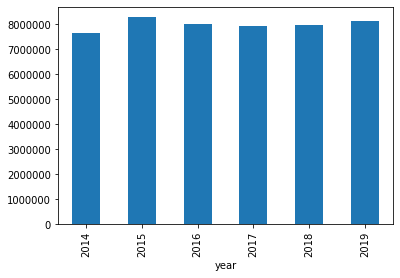

In [122]:
# столбчатая диаграмма для года
df_spb.query('spb_center_km<=6.0').groupby('year')['last_price'].mean().plot(kind='bar');

В центре Санкт-Петербурга квартиры большего размера чем в целом в городе: среднее значение больше на 13 метров, а медиана на 18 метров. Цена соответственно тоже выше в центре города (средняя цена 8 млн. рублей, против 5,9 млн. рублей). Высота потолков немного выше в центральной части, чем в целом в городе.
В целом влияние факторов на стоимость квартиры в центре Санкт-Петербурга и  по городу, практически одинаковое, за исключением удаленности от центра и года размещения объявления. Для всего города влияние удаленности сильнее, а влияние года слабее. 

## Общий вывод

Было проведено исследование объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В ходе предобработке данных было выявлено огромное количество пропусков (из 22 столбцов пропуски присутствуют в 14 столбцах). Скорее всего пропуски появились в результате того, что при заполнении информации о квартире продавец не указал все данные (не заполнил все поля). Так же пропуски могли стать результатом некорректной выгрузки данных или же сбой при сборе информации. Заменять все пропуски мы не стали, так как для данного исследования пропуски не повлияют на его результат. Однако на это стоит обратить внимание и в дальнейшем не допускать появления такое числа пропусков (например, сделать все или большинтво полей обязательными при заполнении).

Так же данные были приведены к необходимому типу (часть столбцов с вещественным типом были преобразованы в целочисленный тип, а столбец с датой публикацией был приведен к datetime). Кроме того были убраны неявные дубликаты в столбце с названиями населенного пункта. 

Для дальнейшего анализа было создано 7 новых столбцов: стоимость квадратного метра, день недели, месяц и год публикации объявления, категория этажа, соотношение жилой и общей площади и отношение площади кухни к общей.

Проводя исследовательский анализ данных были выявлены и убраны редкие и выбивающиеся значения, дабы избежать искажение результатов анализа. Коэффициенты кореляции и диаграммы рассеивания показали, что цена квартиры зависит от площади: чем больше площадь, тем выше цена. Количество комнат влияет на цену почти в 1.5 раза слабее (коэффициент корреляции = 0,45). Что касается удаленности от цента, то коэффициент корреляции отрицателен, то есть чем меньше расстояние до центра, тем выше цена. Так же можно сказать, что квартиры, располагающиеся на первом и последнем этажах стоят дешевле, чем квартиры располагающиеся на любом другом этаже. Влияние даты размещения объявления не было выявлено, т.е. при изменении даты размещения объявления цена квартиры остается прежней.

Было выделено 10 населённых пунктов с наибольшим числом объявлений, к которым относятся: Санкт-Петербург, Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчина, Выборг. Для данных населенных пунктов была рассчитана средняя цена квадратного метра, которая показала, что самое дорогое жилье в Санкт-Петербурге и Пушкине (107 и 100 тыс. за кв.м), а самое дешевое жилье в Выборге (58 тыс. за кв.м). Далее идут Всеволожск и Гатчина, стоимость квадратного метра которых составила 67 и 68 тысяч.

Была определена граница центра Санкт-Петербурга, которая составила 6 км. Проанализировав данную территорию, мы пришли к выводу, что в центре Санкт-Петербурга квартиры большего размера чем в целом в городе: среднее значение больше на 13 метров, а медиана на 18 метров. Цена соответственно тоже выше в центре города (средняя цена 8 млн. рублей, против 5,9 млн. рублей). Высота потолков немного выше в центральной части, чем в целом в городе.